# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [84]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [85]:
# Read your api key environment variable
# YOUR CODE HERE!
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv()
api_key = os.getenv("news_api")


In [86]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [87]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
Bitcoin_news = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)

In [88]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
Ethereum_news = newsapi.get_everything(
    q="Ethereum",
    language="en"
)

In [89]:
bitcoin_sentiments = []

for article in Bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
cols = ["compound", "negative", "neutral", "positive", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,compound,negative,neutral,positive,text
0,0.0000,0.0,1.000,0.000,Tesla’s relationship with bitcoin is not a dal...
1,0.7506,0.0,0.829,0.171,Cryptocurrency continues to gain mainstream ac...
2,0.6124,0.0,0.865,0.135,The crypto industry as a whole has seen a mome...
3,0.0000,0.0,1.000,0.000,Cryptocurrency prices continued to tumble Frid...
4,0.7003,0.0,0.833,0.167,image copyrightGetty Images\r\nimage captionEl...


In [8]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!


,Compound,Negative,Neutral,Positive,text
0,0.0516,0.900,0.036,0.064,Cryptocurrency exchange Binance has resumed tr...
1,0.3818,0.943,0.000,0.057,"Bitcoin is now trading at around $8,130, up a ..."
2,-0.2263,0.888,0.065,0.047,Binance has vowed to raise the quality of its ...
3,0.3612,0.937,0.000,0.063,A new payment network called Flexa is launchin...
4,-0.6486,0.897,0.103,0.000,"If you thought that the theft of 7,000 bitcoin..."


In [90]:
ethereum_sentiments = []

for article in Ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.4019,0.15,0.778,0.072,Their investors call them disruptive innovator...
1,0.7506,0.00,0.829,0.171,Cryptocurrency continues to gain mainstream ac...
2,0.0258,0.00,0.966,0.034,Venmo is jumping aboard the cryptocurrency ban...
3,0.0000,0.00,1.000,0.000,New York (CNN Business)Bitcoin prices continue...
4,0.4754,0.00,0.909,0.091,"The creators behind CryptoPunks, one of the mo..."


In [9]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!

,Compound,Negative,Neutral,Positive,text
0,-0.3919,0.801,0.140,0.059,President Trump tweeted insults at Twitter aga...
1,0.1779,0.961,0.000,0.039,After announcing that they were launching a ma...
2,0.0000,1.000,0.000,0.000,Captain Kirk and neo-Dadaists. Repugnant marke...
3,-0.8020,0.717,0.217,0.066,"So long as cryptocurrency exists, so too will ..."
4,-0.6486,0.897,0.103,0.000,"If you thought that the theft of 7,000 bitcoin..."


In [91]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.207160,0.010300,0.930800,0.058950
std,0.311629,0.025375,0.078108,0.070241
min,-0.381800,0.000000,0.777000,0.000000
25%,0.000000,0.000000,0.857000,0.000000
50%,0.012900,0.000000,0.951000,0.017000
75%,0.360375,0.000000,1.000000,0.119250
max,0.750600,0.080000,1.000000,0.179000


In [92]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.00000
mean,0.103435,0.014800,0.943450,0.04175
std,0.321142,0.038919,0.071019,0.06077
min,-0.401900,0.000000,0.778000,0.00000
25%,0.000000,0.000000,0.924000,0.00000
50%,0.000000,0.000000,0.958500,0.00000
75%,0.289900,0.000000,1.000000,0.06600
max,0.817600,0.150000,1.000000,0.21000


In [ ]:
Bitcoin had a higher mean positive score 
Ethereum had a higher max compound score of 0.817600
Ethereum had a higher max positive score of 0.2100

### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [93]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('reuters')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package reuters to /Users/faisal/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /Users/faisal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/faisal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [94]:

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw_addons = {" ", "r", "u", "z", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "s", "t", "v", "w", "x", "y", "www", "techcrunch", "reuters", "source", "id", "url", "http", "urltoimage", "content", "published", "publishedat", "jpg" "char", "ha", "source", "name", ' jpg', 'jpg ', ' jpg ' "author", "article", "com", "wp", "uploads", "jpeg", "staff", "title"}


In [95]:
lemmatizer = WordNetLemmatizer()
def tokenizer(text):
    sw=set(stopwords.words('english'))
    regex=re.compile('[^a-zA-Z]')
    re_clean=regex.sub(' ',text)
    words=word_tokenize(re_clean)
    lem=[lemmatizer.lemmatize(word) for word in words]
    tokens=[word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    return tokens

In [96]:
bitcoin_df["tokens"]= bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.0000,0.0,1.000,0.000,Tesla’s relationship with bitcoin is not a dal...,"[tesla, relationship, bitcoin, dalliance, acco..."
1,0.7506,0.0,0.829,0.171,Cryptocurrency continues to gain mainstream ac...,"[cryptocurrency, continues, gain, mainstream, ..."
2,0.6124,0.0,0.865,0.135,The crypto industry as a whole has seen a mome...,"[crypto, industry, whole, seen, momentous, yea..."
3,0.0000,0.0,1.000,0.000,Cryptocurrency prices continued to tumble Frid...,"[cryptocurrency, price, continued, tumble, fri..."
4,0.7003,0.0,0.833,0.167,image copyrightGetty Images\r\nimage captionEl...,"[image, copyrightgetty, images, image, caption..."


In [15]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0516,0.900,0.036,0.064,Cryptocurrency exchange Binance has resumed tr...,"[Cryptocurrency, exchange, Binance, resumed, t..."
1,0.3818,0.943,0.000,0.057,"Bitcoin is now trading at around $8,130, up a ...","[Bitcoin, trading, around, 8,130, whopping, 60..."
2,-0.2263,0.888,0.065,0.047,Binance has vowed to raise the quality of its ...,"[Binance, vowed, raise, quality, security, aft..."
3,0.3612,0.937,0.000,0.063,A new payment network called Flexa is launchin...,"[new, payment, network, called, Flexa, launchi..."
4,-0.6486,0.897,0.103,0.000,"If you thought that the theft of 7,000 bitcoin...","[thought, theft, 7,000, bitcoins, one, world, ..."


In [97]:
ethereum_df["tokens"]= ethereum_df["text"].apply(tokenizer)
ethereum_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.4019,0.15,0.778,0.072,Their investors call them disruptive innovator...,"[investor, call, disruptive, innovator, detrac..."
1,0.7506,0.00,0.829,0.171,Cryptocurrency continues to gain mainstream ac...,"[cryptocurrency, continues, gain, mainstream, ..."
2,0.0258,0.00,0.966,0.034,Venmo is jumping aboard the cryptocurrency ban...,"[venmo, jumping, aboard, cryptocurrency, bandw..."
3,0.0000,0.00,1.000,0.000,New York (CNN Business)Bitcoin prices continue...,"[new, york, cnn, business, bitcoin, price, con..."
4,0.4754,0.00,0.909,0.091,"The creators behind CryptoPunks, one of the mo...","[creator, behind, cryptopunks, one, popular, n..."


In [16]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.3919,0.801,0.140,0.059,President Trump tweeted insults at Twitter aga...,"[President, Trump, tweeted, insult, Twitter, m..."
1,0.1779,0.961,0.000,0.039,After announcing that they were launching a ma...,"[announcing, launching, managed, blockchain, s..."
2,0.0000,1.000,0.000,0.000,Captain Kirk and neo-Dadaists. Repugnant marke...,"[Captain, Kirk, neo-Dadaists, Repugnant, marke..."
3,-0.8020,0.717,0.217,0.066,"So long as cryptocurrency exists, so too will ...","[long, cryptocurrency, exists, extraordinaryle..."
4,-0.6486,0.897,0.103,0.000,"If you thought that the theft of 7,000 bitcoin...","[thought, theft, 7,000, bitcoins, one, world, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [98]:
from collections import Counter
from nltk import ngrams
import json

In [99]:
#Attempts to create the ngrams

# bitcoin_article_words = []
# for words in bitcoin_df["text"]:
 #   word_list_btc = words
  #  bitcoin_article_words.append(word_list_btc)
#tokenized=word_tokenize(bitcoin_article_words)

#ethereum_article_words = []
#for words in ethereum_df["tokens"]:
    #ethereum_article_words.append(words)
    
#def cryptogram_counter(corpus):
 #   big_string = " ".join(corpus)
  #  processed = tokenizer(big_string)
   # top_20 = dict(Counter(processed).most_common(20))
    #return pd.DataFrame(list(top_10.items()))

#cryptogram_counter(bitcoin_article_words)
#tokenized=tokenizer(bitcoin_article_words)
# [bitcoin_text = bitcoin_df["text"].str.cat()

# clean_bitcoin_text =  tokenizer(bitcoin_text)
# bigram_counts = Counter(ngrams(clean_bitcoin_text, n=2))
# bigram_counts.most_common(10)]

In [100]:
Bitcoin_news_copy=Bitcoin_news.copy()
Bitcoin_news_copy = json.dumps(Bitcoin_news_copy)
##had to figure out that you can't apply nlp to dictionary!!!

Ethereum_news_copy=Ethereum_news.copy()
Ethereum_news_copy = json.dumps(Ethereum_news_copy)


Bitcoin_tokenize= tokenizer(Bitcoin_news_copy)
Ethereum_tokenize=tokenizer(Ethereum_news_copy)


#print(Ethereum_tokenize)
btcbigram_counts = Counter(ngrams(Bitcoin_tokenize, n=2))
btcbigram_counts.most_common(20)

[(('char', 'author'), 12),
 (('elon', 'musk'), 6),
 (('jack', 'dorsey'), 6),
 (('non', 'employee'), 6),
 (('employee', 'director'), 6),
 (('director', 'get'), 6),
 (('get', 'fee'), 6),
 (('crypto', 'currency'), 6),
 (('bitcoin', 'ethereum'), 5),
 (('description', 'bitcoin'), 5),
 (('bitcoin', 'hit'), 5),
 (('hit', 'record'), 5),
 (('venmo', 'app'), 4),
 (('gettyimages', 'jpg'), 4),
 (('bitcoin', 'leading'), 4),
 (('price', 'continued'), 4),
 (('earth', 'day'), 4),
 (('microstrategy', 'inc'), 4),
 (('inc', 'major'), 4),
 (('major', 'bitcoin'), 4)]

In [18]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!

[(('40', 'million'), 3),
 (('Cryptocurrency', 'exchange'), 2),
 (('exchange', 'Binance'), 2),
 (('crypto', 'asset'), 2),
 (('world', '’'), 2),
 (('crypto', 'exchange'), 2),
 (('7,000', 'bitcoins'), 2),
 (('one', 'world'), 2),
 (('price', 'Bitcoin'), 2),
 (('Wall', 'Street'), 2),
 (('Street', 'Market'), 2),
 (('last', 'week'), 2),
 (('char', 'Cryptocurrency'), 2),
 (('Binance', 'resumed'), 1),
 (('resumed', 'trading'), 1),
 (('trading', 'activity'), 1),
 (('activity', 'Users'), 1),
 (('Users', 'cancel'), 1),
 (('cancel', 'open'), 1),
 (('open', 'order'), 1)]

In [101]:
ethbigram_counts = Counter(ngrams(Ethereum_tokenize, n=2))
ethbigram_counts.most_common(20)

[(('bitcoin', 'ethereum'), 12),
 (('char', 'author'), 11),
 (('record', 'high'), 8),
 (('cryptocurrency', 'ether'), 8),
 (('description', 'cryptocurrency'), 7),
 (('ethereum', 'blockchain'), 7),
 (('ether', 'hit'), 7),
 (('hit', 'record'), 7),
 (('co', 'founder'), 6),
 (('high', 'monday'), 6),
 (('char', 'null'), 5),
 (('author', 'ethereum'), 5),
 (('extending', 'last'), 5),
 (('last', 'week'), 5),
 (('week', 'rally'), 5),
 (('rally', 'wake'), 5),
 (('wake', 'report'), 5),
 (('fresh', 'record'), 5),
 (('venmo', 'app'), 4),
 (('nft', 'project'), 4)]

In [19]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!

[(('private', 'key'), 5),
 (('Ethereum', 'ETH'), 3),
 (('blockchain', 'bandit'), 2),
 (('last', 'year'), 2),
 (('weak', 'private'), 2),
 (('Elon', 'Musk'), 2),
 (('worth', 'Ethereum'), 2),
 (('JP', 'Morgan'), 2),
 (('President', 'Trump'), 1),
 (('Trump', 'tweeted'), 1),
 (('tweeted', 'insult'), 1),
 (('insult', 'Twitter'), 1),
 (('Twitter', 'morning'), 1),
 (('morning', 'time'), 1),
 (('time', 'Jack'), 1),
 (('Jack', 'took'), 1),
 (('took', 'conversation'), 1),
 (('conversation', 'platform'), 1),
 (('platform', 'White'), 1),
 (('White', 'House'), 1)]

In [102]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [103]:
token_count(Bitcoin_tokenize, N = 10)

[('bitcoin', 60),
 ('crypto', 25),
 ('author', 20),
 ('description', 20),
 ('char', 20),
 ('cryptocurrency', 17),
 ('jpg', 15),
 ('tesla', 13),
 ('energy', 12),
 ('venmo', 10)]

In [21]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!

[('char', 16),
 ('Bitcoin', 8),
 ('’', 8),
 ('price', 6),
 ('hacker', 6),
 ('exchange', 5),
 ('Binance', 5),
 ('crypto', 4),
 ('cryptocurrency', 4),
 ('million', 4)]

In [104]:
token_count(Ethereum_tokenize, N = 10)

[('ethereum', 42),
 ('author', 20),
 ('description', 20),
 ('char', 20),
 ('bitcoin', 19),
 ('cryptocurrency', 18),
 ('crypto', 17),
 ('entrepreneur', 15),
 ('record', 15),
 ('ether', 15)]

In [22]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!

[('char', 19),
 ('Ethereum', 9),
 ('blockchain', 8),
 ('key', 7),
 ('private', 5),
 ('world', 5),
 ('time', 4),
 ('weak', 4),
 ('million', 4),
 ('transaction', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [105]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]


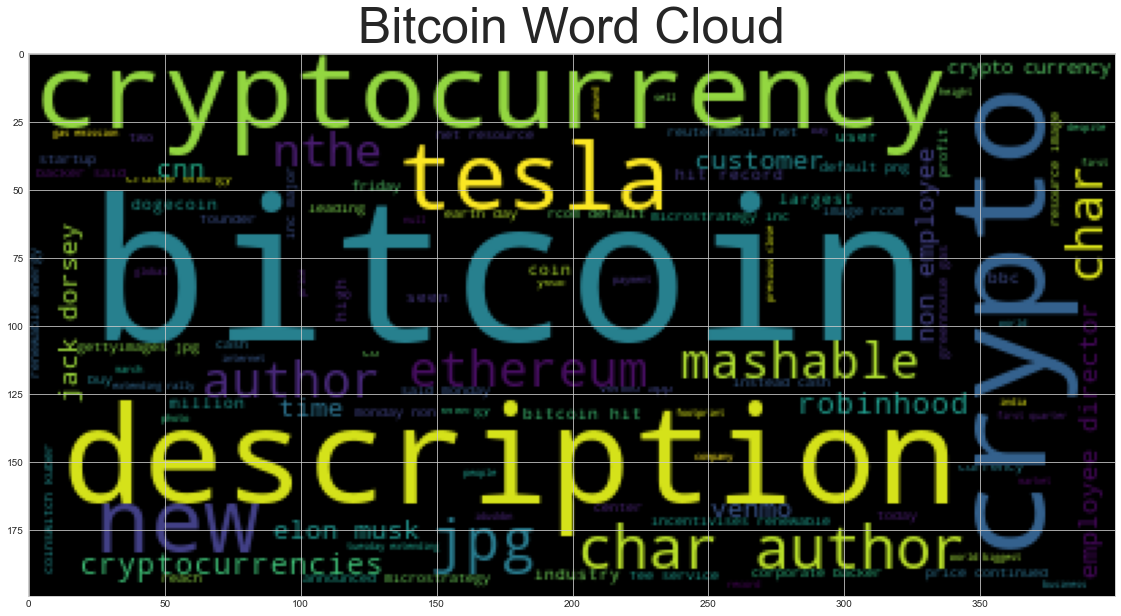

In [106]:
btcbig_string = ' '.join(Bitcoin_tokenize)
btcwc = WordCloud().generate(btcbig_string)
plt.title("Bitcoin Word Cloud", fontsize=50, loc="center")
plt.imshow(btcwc)

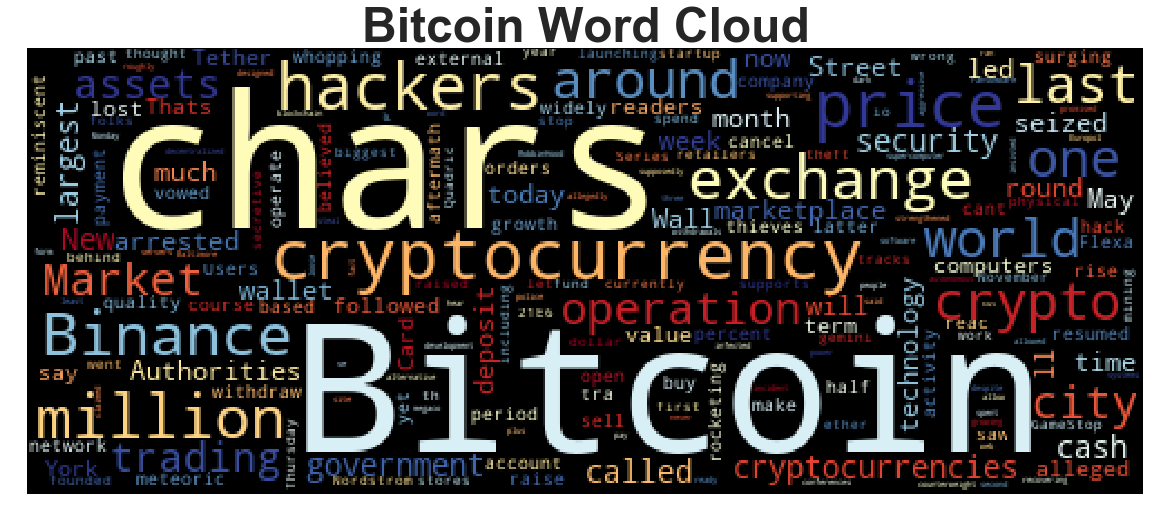

In [25]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!

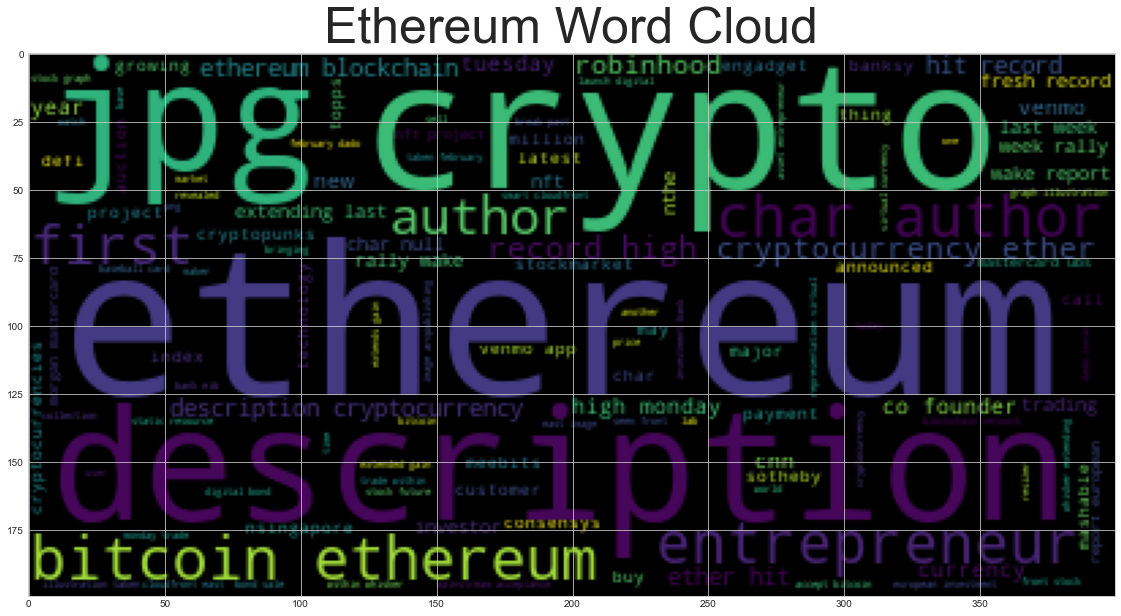

In [107]:
ethbig_string = ' '.join(Ethereum_tokenize)
ethwc = WordCloud().generate(ethbig_string)
plt.title("Ethereum Word Cloud", fontsize=50, loc="center")
plt.imshow(ethwc)

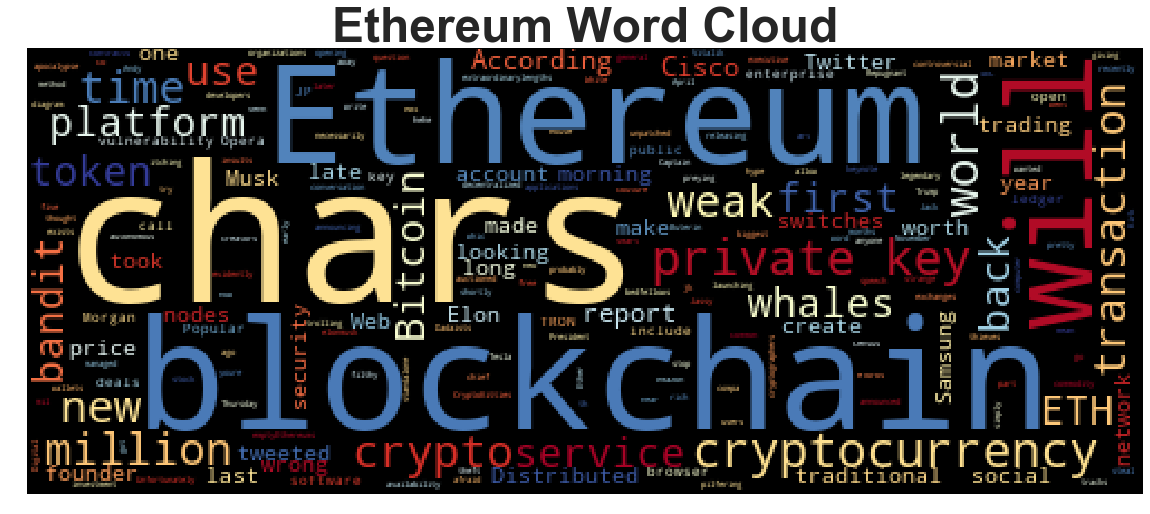

In [26]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [108]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [109]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')


## Bitcoin NER

In [110]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
print(btcbig_string)

status ok totalresults author rebecca bellan tesla see bitcoin important financial tool access cash quickly description tesla relationship bitcoin dalliance according comment made company cfo dubbed cmaster coin zach kirkhorn earnings call monday instead company belief longevity bitcoin despite volatili tesla see bitcoin important financial tool access cash quickly tesla bitcoin alt jpg tesla relationship bitcoin dalliance according comment made company cfo dubbed cmaster coin zach kirkhorn earnings call monday instead compan char null lifehacker author mike winters exchange crypto venmo sort thing description cryptocurrency continues gain mainstream acceptance paypal announced added bitcoin ethereum bitcoin cash litecoin venmo app user base million move certainly make easier people buy crypto bu twocents lifehacker exchange crypto venmo youre tha kinja img gawker medium image upload fill auto fl progressive center pg qhbu fnqmien giu jpg cryptocurrency continues gain mainstream accept

In [111]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc= nlp(btcbig_string)


# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"]="Bitcoin NER"


In [112]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [113]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print(ent.text, ent.label_)

rebecca bellan PERSON
bitcoin GPE
bitcoin GPE
cfo ORG
monday DATE
bitcoin GPE
tesla bitcoin LOC
jpg tesla ORG
bitcoin GPE
cfo ORG
monday DATE
compan GPE
lifehacker GPE
mike PERSON
bitcoin GPE
app ORG
million CARDINAL
img gawker PERSON
qhbu fnqmien giu jpg cryptocurrency PERSON
bitcoin GPE
app ORG
million CARDINAL
african NORP
momentous year DATE
bitcoin GPE
bitcoin GPE
adop african NORP
jpg crypto PERSON
momentous year DATE
bitcoin GPE
lucas matney PERSON
bitcoin GPE
friday DATE
first ORDINAL
roughly week week DATE
bitcoin GPE
jpg PERSON
friday DATE
first ORDINAL
early march DATE
bbc news ORG
bbc news ORG
facebook bbcnews tesla WORK_OF_ART
bitcoin GPE
tesla ORDINAL
bbc co PERSON
uk news business ichef ORG
uk news branded news ORG
first quarter DATE
gizmodo ORG
brian kahn jack elon PERSON
jack dorsey PERSON
bitcoin GPE
gizmodo NORP
jack elon PERSON
bitcoin GPE
img gawker PERSON
qc vtxtafpa fn xpxo jpg PERSON
jack dorsey PERSON
stan schroeder PERSON
bitcoin ethereum ORG
nthe social payme

---

## Ethereum NER

In [114]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
print(ethbig_string)

status ok totalresults author david riggs radical ethereum entrepreneur redefining rape kit mean description investor call disruptive innovator detractor call cdirty scammer leda health co founder think advocate sexual assault survivor radical ethereum entrepreneur redefining rape kit mean created survivor jpg investor call disruptive innovator detractors like north carolina attorney general josh stein call dirty scammer leda health co founder madison campbell liesel vaidya th char null lifehacker author mike winters exchange crypto venmo sort thing description cryptocurrency continues gain mainstream acceptance paypal announced added bitcoin ethereum bitcoin cash litecoin venmo app user base million move certainly make easier people buy crypto bu twocents lifehacker exchange crypto venmo youre tha kinja img gawker medium image upload fill auto fl progressive center pg qhbu fnqmien giu jpg cryptocurrency continues gain mainstream acceptance paypal announced added bitcoin ethereum bitco

In [80]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doceth= nlp(ethbig_string)
# Add a title to the document
# YOUR CODE HERE!
doceth.user_data["title"]="Ethereum NER"

In [115]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doceth, style='ent')

In [116]:
# List all Entities
# YOUR CODE HERE!
for ent in doceth.ents:
    print(ent.text, ent.label_)

david riggs PERSON
jpg PERSON
north carolina GPE
josh stein PERSON
madison campbell PERSON
liesel vaidya PERSON
lifehacker PERSON
mike PERSON
bitcoin GPE
app ORG
million CARDINAL
img gawker PERSON
qhbu fnqmien giu jpg cryptocurrency PERSON
bitcoin GPE
app ORG
million CARDINAL
stan schroeder PERSON
bitcoin ethereum ORG
nthe social payment service ORG
tuesday DATE
bitcoin GPE
jpg jpg PERSON
tuesday DATE
cnn ORG
paul la monica cnn PERSON
bitcoin GPE
bitcoin GPE
saturday DATE
cnn ORG
cdn cnn PERSON
jpg PERSON
bitcoin price PERSON
saturday DATE
lucas matney PERSON
larva labs ORG
one CARDINAL
png creator PERSON
one CARDINAL
mike butcher PERSON
morgan mastercard ubs ORG
million CARDINAL
morgan mastercard ubs ag ORG
morgan mastercard ubs ORG
joe lubin jpg consensys PERSON
million CARDINAL
morgan mastercard ubs ag ORG
compan GPE
monday DATE
last week DATE
european NORP
dado ruvic ORG
monday DATE
last week DATE
european NORP
zre jyn cvui ORG
ko txo sbihxcakowrlsbqwlu PERSON
february DATE
dado ru